Topics covered:

*   Numpy array vs Python lists
*   Advanced Indexing
*   Broadcasting
*   Working with Mathematical formulas
-   Working with missing values
-   Plotting graphs


### Numpy array vs Python lists



*   Speed - numpy array is faster than python list.
*   Memory - numpy array takes less memory in comparison to python list.
-   Convenience - numpy array are more convenient.


In [ ]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])

print(time.time() - start)

2.732386350631714


In [ ]:
# numpy
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a + b
print(time.time() - start)

0.0318760871887207


In [ ]:
2.73/0.03

91.0

In [ ]:
# memory
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

In [ ]:
a = np.arange(10000000)
sys.getsizeof(a)

80000112

In [ ]:
a = np.arange(10000000,dtype=np.int32)
sys.getsizeof(a)

40000112

In [ ]:
# convenience

### Advanced Indexing

**Normal indexing and slicing**

In [ ]:
# Normal Indexing and slicing

a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
a[1,2]

5

In [ ]:
a[1:3,1:3]

array([[4, 5],
       [7, 8]])

**Fancy indexing**

In [ ]:
# Fancy indexing
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
# retrive row 1,3,4
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
# retrive row 1,3,4,6
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [ ]:
# retrive column 1,3,4
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

**Boolean Indexing**

In [ ]:
# Boolean Indexing - filter data based on given condition
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[80, 99,  9, 66],
       [77, 50, 88, 14],
       [19, 38, 33, 59],
       [34, 47, 29, 31],
       [55, 19, 55, 77],
       [77, 10, 43, 75]])

In [ ]:
# find all numbers greater than 50
a>50   # boolean array

array([[ True,  True, False,  True],
       [ True, False,  True, False],
       [False, False, False,  True],
       [False, False, False, False],
       [ True, False,  True,  True],
       [ True, False, False,  True]])

In [ ]:
a[a>50]    # boolean array masked on 'a' to get numbers greater than 50

array([80, 99, 66, 77, 88, 59, 55, 55, 77, 77, 75])

In [ ]:
# find out even numbers
a%2==0

array([[ True, False, False,  True],
       [False,  True,  True,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False,  True, False, False]])

In [ ]:
a[a%2==0]

array([80, 66, 50, 88, 14, 38, 34, 10])

In [ ]:
# find all numbers greater than 50 and are even
a[(a>50) & (a%2==0)]

array([80, 66, 88])

In [ ]:
a[(a>50) and (a%2==0)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Use '&' and '|' for and/or operation (don't use and,or operation), as working with boolean values.

In [ ]:
# find all numbers not divisible by 7
a[~(a%7==0)]

array([80, 99,  9, 66, 50, 88, 19, 38, 33, 59, 34, 47, 29, 31, 55, 19, 55,
       10, 43, 75])

In [ ]:
a[a%7!=0]

array([80, 99,  9, 66, 50, 88, 19, 38, 33, 59, 34, 47, 29, 31, 55, 19, 55,
       10, 43, 75])

In [ ]:
a[a%7==0]

array([77, 14, 77, 77])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [ ]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [ ]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [ ]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [40]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

**Sigmoid Function**

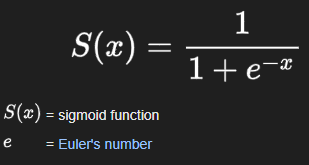

In [42]:
# sigmoid
def sigmoid(array):
  return 1/(1+np.exp(-array))

a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

**Mean Squared Error**

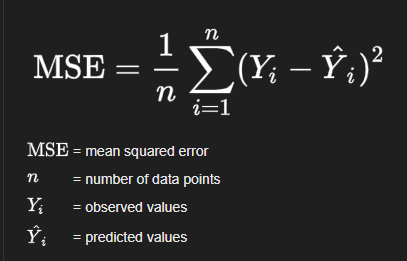

In [43]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [44]:
actual

array([40,  3, 47, 20,  3,  7, 31, 47, 26,  5, 19,  8, 38, 46,  8, 11, 18,
       39, 28, 38, 17, 14, 18, 15,  1])

In [45]:
predicted

array([37, 25, 42, 40, 47, 27,  7,  4, 31,  4, 37, 36, 32, 35, 23, 33, 17,
        9, 26, 28, 14, 47, 23, 20, 35])

In [48]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

In [49]:
mse(actual,predicted)

439.52

**Binary Cross Entropy**

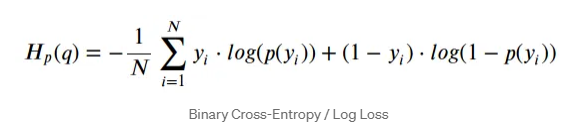

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [61]:
actual = np.random.randint(1,50,25)
predicted = np.random.random(25)

In [62]:
actual

array([45, 42, 17, 34, 27,  9,  5, 11, 21, 43, 36, 15, 11, 49, 34, 42, 47,
        4, 17,  2, 18, 13, 44, 21, 19])

In [63]:
predicted

array([0.68067151, 0.44440452, 0.11803839, 0.55314884, 0.12258991,
       0.20627884, 0.76323328, 0.61461092, 0.48611229, 0.97551471,
       0.16419026, 0.50061216, 0.52884811, 0.39786695, 0.72926263,
       0.95567606, 0.76646313, 0.16333319, 0.10195176, 0.84095076,
       0.22961881, 0.91856006, 0.34311643, 0.97836263, 0.08494698])

In [64]:
def bce(actual,predicted):
    return -np.mean(actual*np.log(predicted)+(1-actual)*np.log(1-predicted))

In [65]:
bce(actual,predicted)

-7.619033870177454

### Working with missing values

In [68]:
# Working with missing values -> np.nan
a = np.array([1,2,3,np.nan,5,6,7,np.nan])
a

array([ 1.,  2.,  3., nan,  5.,  6.,  7., nan])

In [70]:
~np.isnan(a)

array([ True,  True,  True, False,  True,  True,  True, False])

In [71]:
a[~np.isnan(a)]

array([1., 2., 3., 5., 6., 7.])

NONE and nan are similar, but in Numpy we use nan for missing values.

### Plotting Graphs

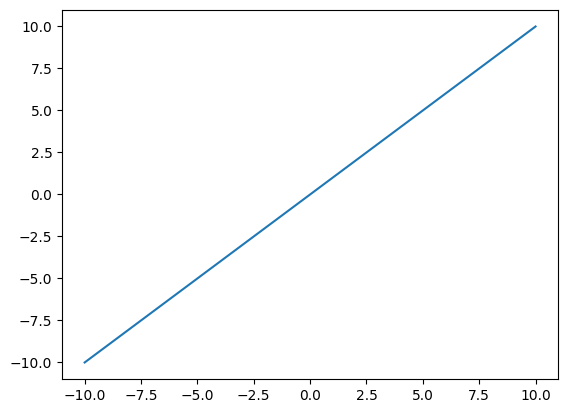

In [74]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)
# plt.show()

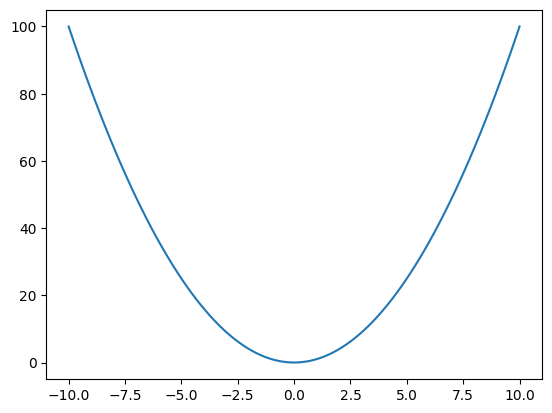

In [75]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)

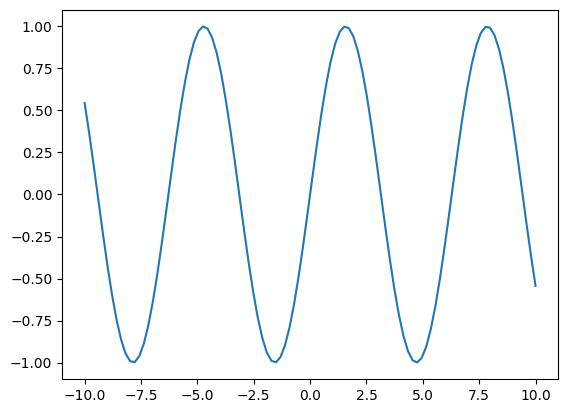

In [76]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)

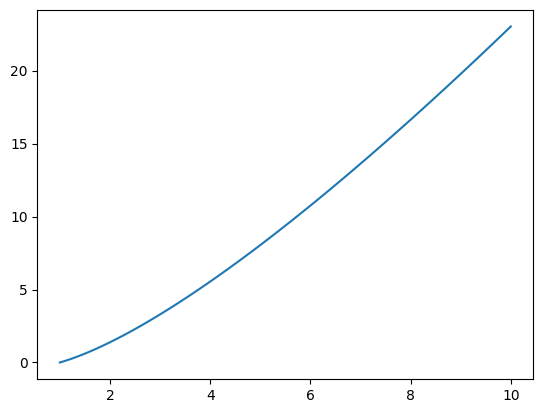

In [77]:
# y = xlog(x)
x = np.linspace(1,10,100)
y = x*np.log(x)
plt.plot(x,y)

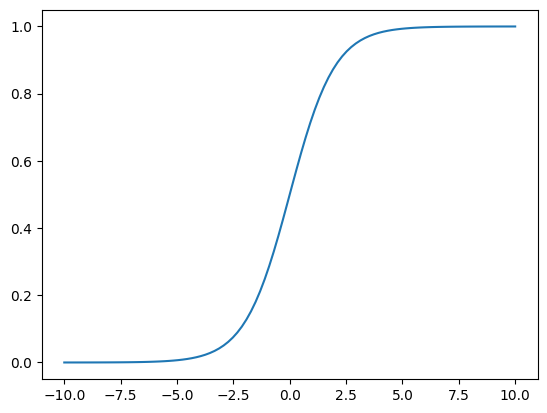

In [78]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)